In [37]:
%load_ext autoreload
%autoreload 2

import WineDataSet
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
w = WineDataSet.WineDataSet()
w.gen_all_feature_combos()
w.gen_pipeline()

print('Using feature combinations: ', len(w.wine_feature_combinations))
print('Using algorithms and parameters: ')
display(w.ml_pipeline)

Using feature combinations:  1
Using algorithms and parameters: 


[LogisticRegression(solver='liblinear'),
 SVC(),
 KNeighborsClassifier(),
 DecisionTreeClassifier(),
 RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000),
 GaussianNB()]

In [71]:
ft = ['residual sugar',
'chlorides',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']
for f in ft:
    print(f, ' min:', min(w.ds[f]), 'max:',  max(w.ds[f]))

residual sugar  min: 0.6 max: 65.8
chlorides  min: 0.009 max: 0.611
total sulfur dioxide  min: 6.0 max: 440.0
density  min: 0.98711 max: 1.03898
pH  min: 2.72 max: 4.01
sulphates  min: 0.22 max: 2.0
alcohol  min: 8.0 max: 14.9


IntProgress(value=0, max=6)

========= RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=1000) ==========
cohen kappa score:  0.7343488529415256
cross val score:  [0.77335984 0.80478088 0.83466135 0.80876494 0.80677291]
cross val mean:  0.8056679841271098


,low,medium,high
low,167,0,8
medium,0,135,41
high,6,34,112


<AxesSubplot: >

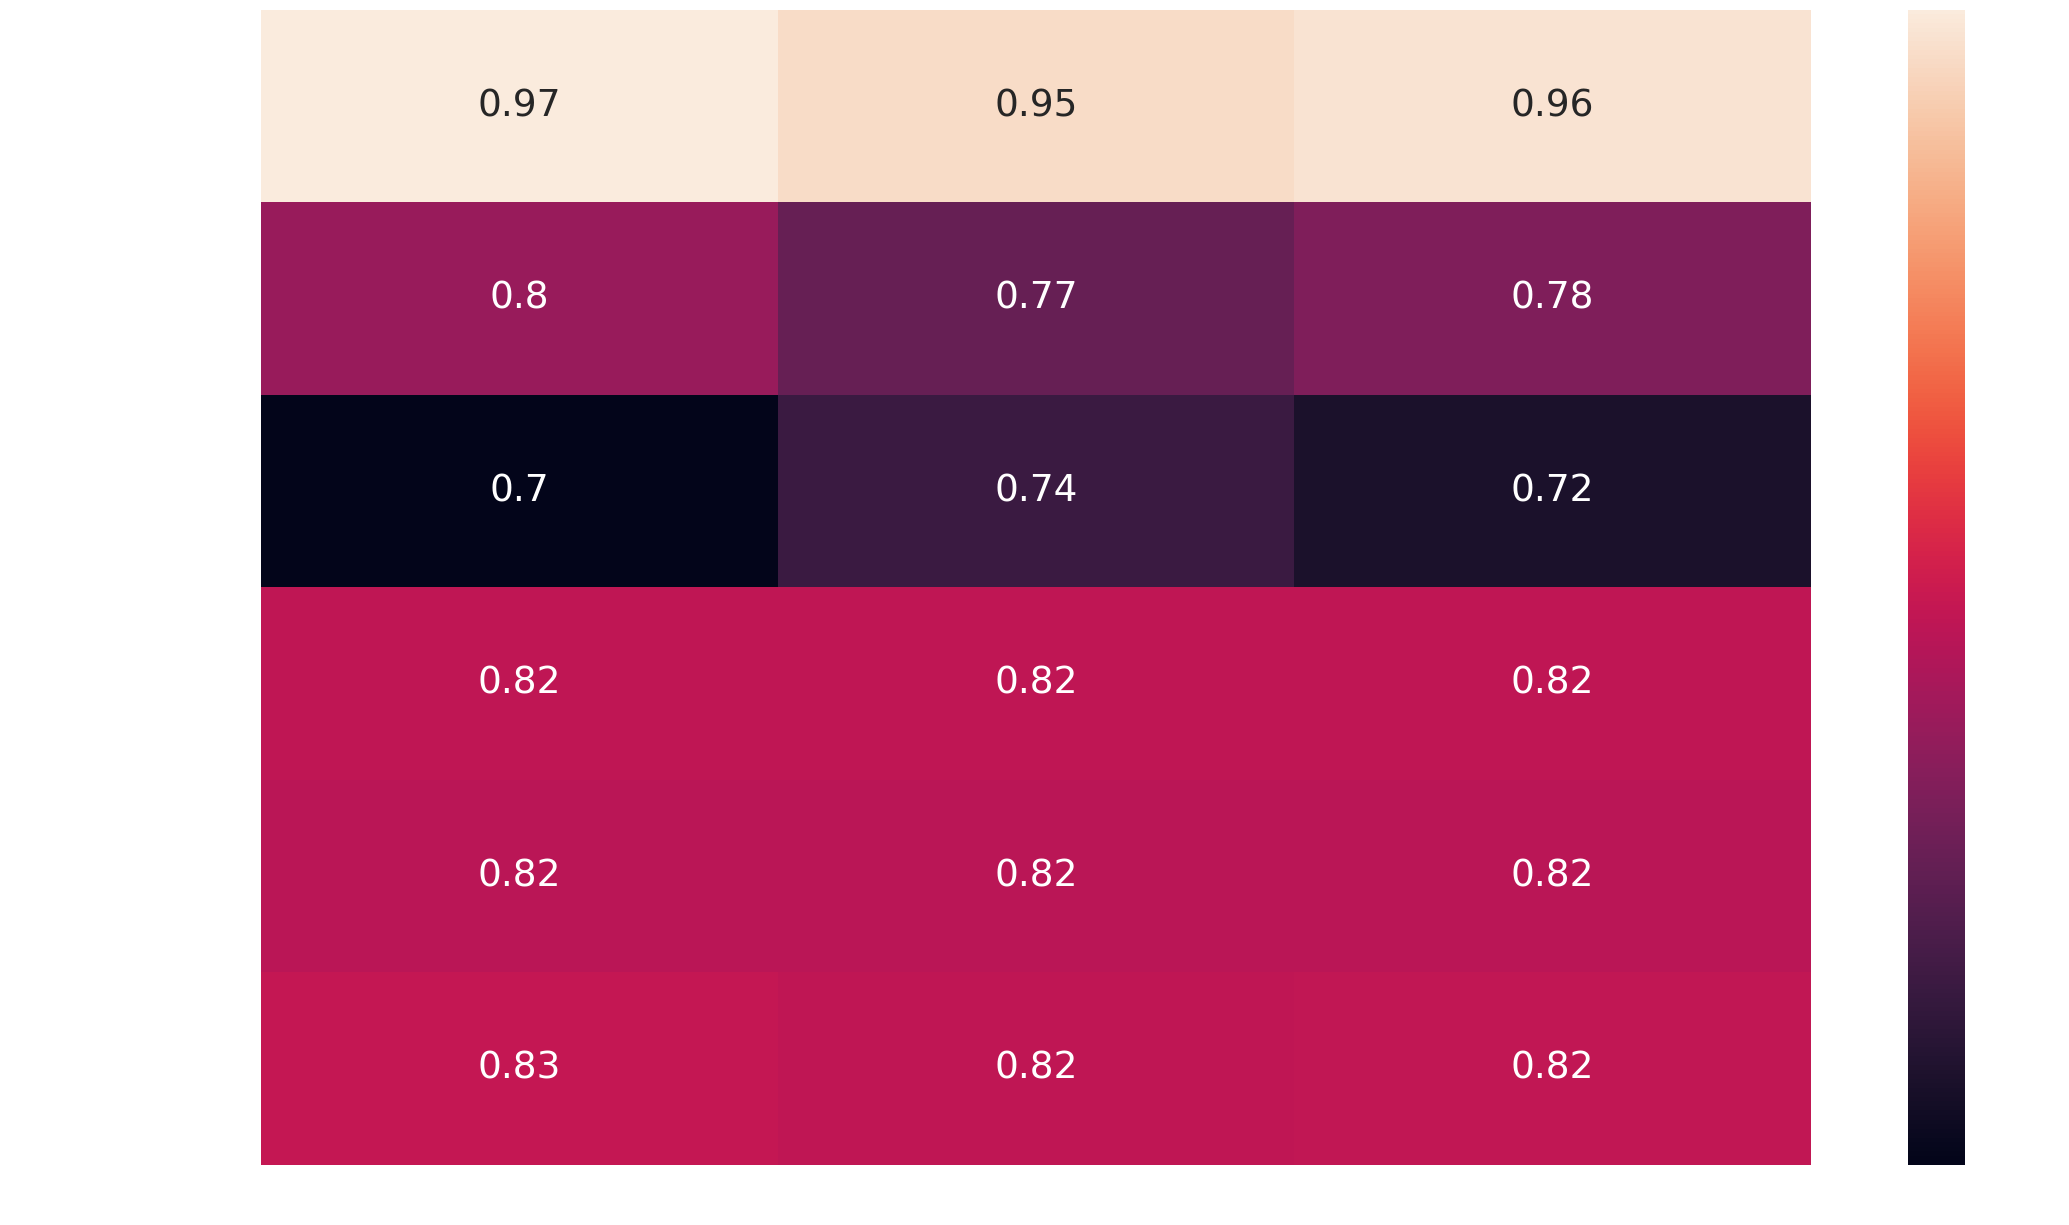

In [80]:
import pandas as pd

evaluation_result = w.evaluate_ml(smote=True, random_state=10, wine_type='red')
# for er in evaluation_result:
er = evaluation_result[-1]
print(f"========= {er['algo']} ==========")

print('cohen kappa score: ', er['cohen kappa score'])
print('cross val score: ', er['cross val score'])
print('cross val mean: ', er['cross val mean'])

conf_matrix = pd.DataFrame(
    er['confusion matrix'],
    index=("low", "medium", "high"),
    columns=("low", "medium", "high")
)
display(conf_matrix)

sns.heatmap(pd.DataFrame(er['classification report']).iloc[:-1, :].T, annot=True)


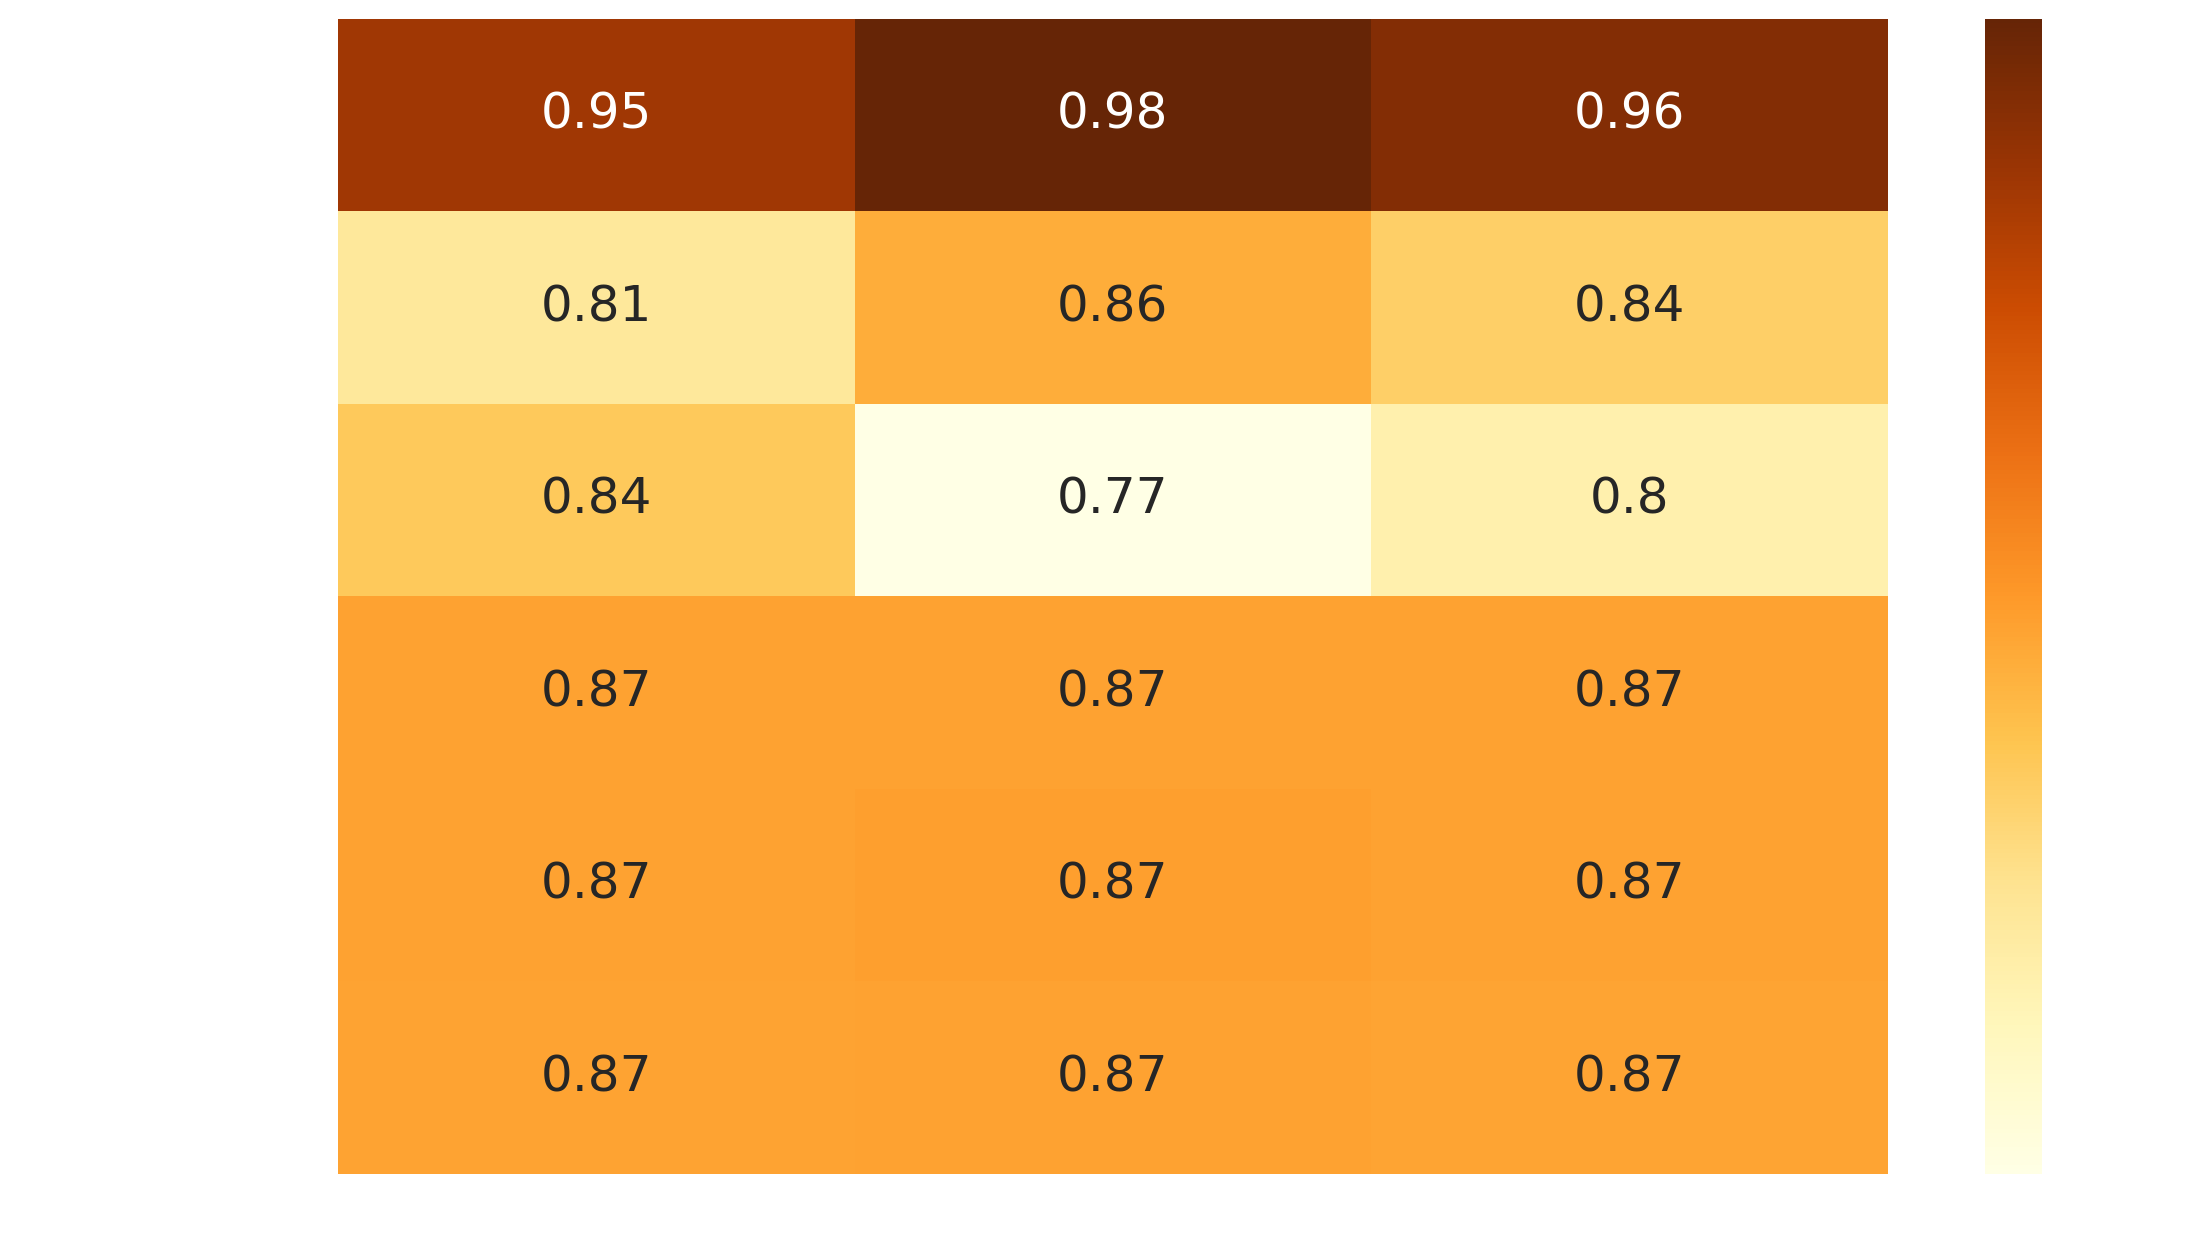

In [65]:
sns.set_context('talk', font_scale=2)
sns.heatmap(pd.DataFrame(er['classification report']).iloc[:-1, :].T, annot=True, cmap='YlOrBr')
w.sv()

,Algorithm,Metric,Value
0,SVC,Cross validation mean,0.53
1,SVC,Cohen kappa score,0.62
2,GaussianNB,Cross validation mean,0.67
3,GaussianNB,Cohen kappa score,0.51
4,KNeighborsClassifier,Cross validation mean,0.68
5,KNeighborsClassifier,Cohen kappa score,0.65
6,LogisticRegression,Cross validation mean,0.71
7,LogisticRegression,Cohen kappa score,0.55
8,DecisionTreeClassifier,Cross validation mean,0.72
9,DecisionTreeClassifier,Cohen kappa score,0.68


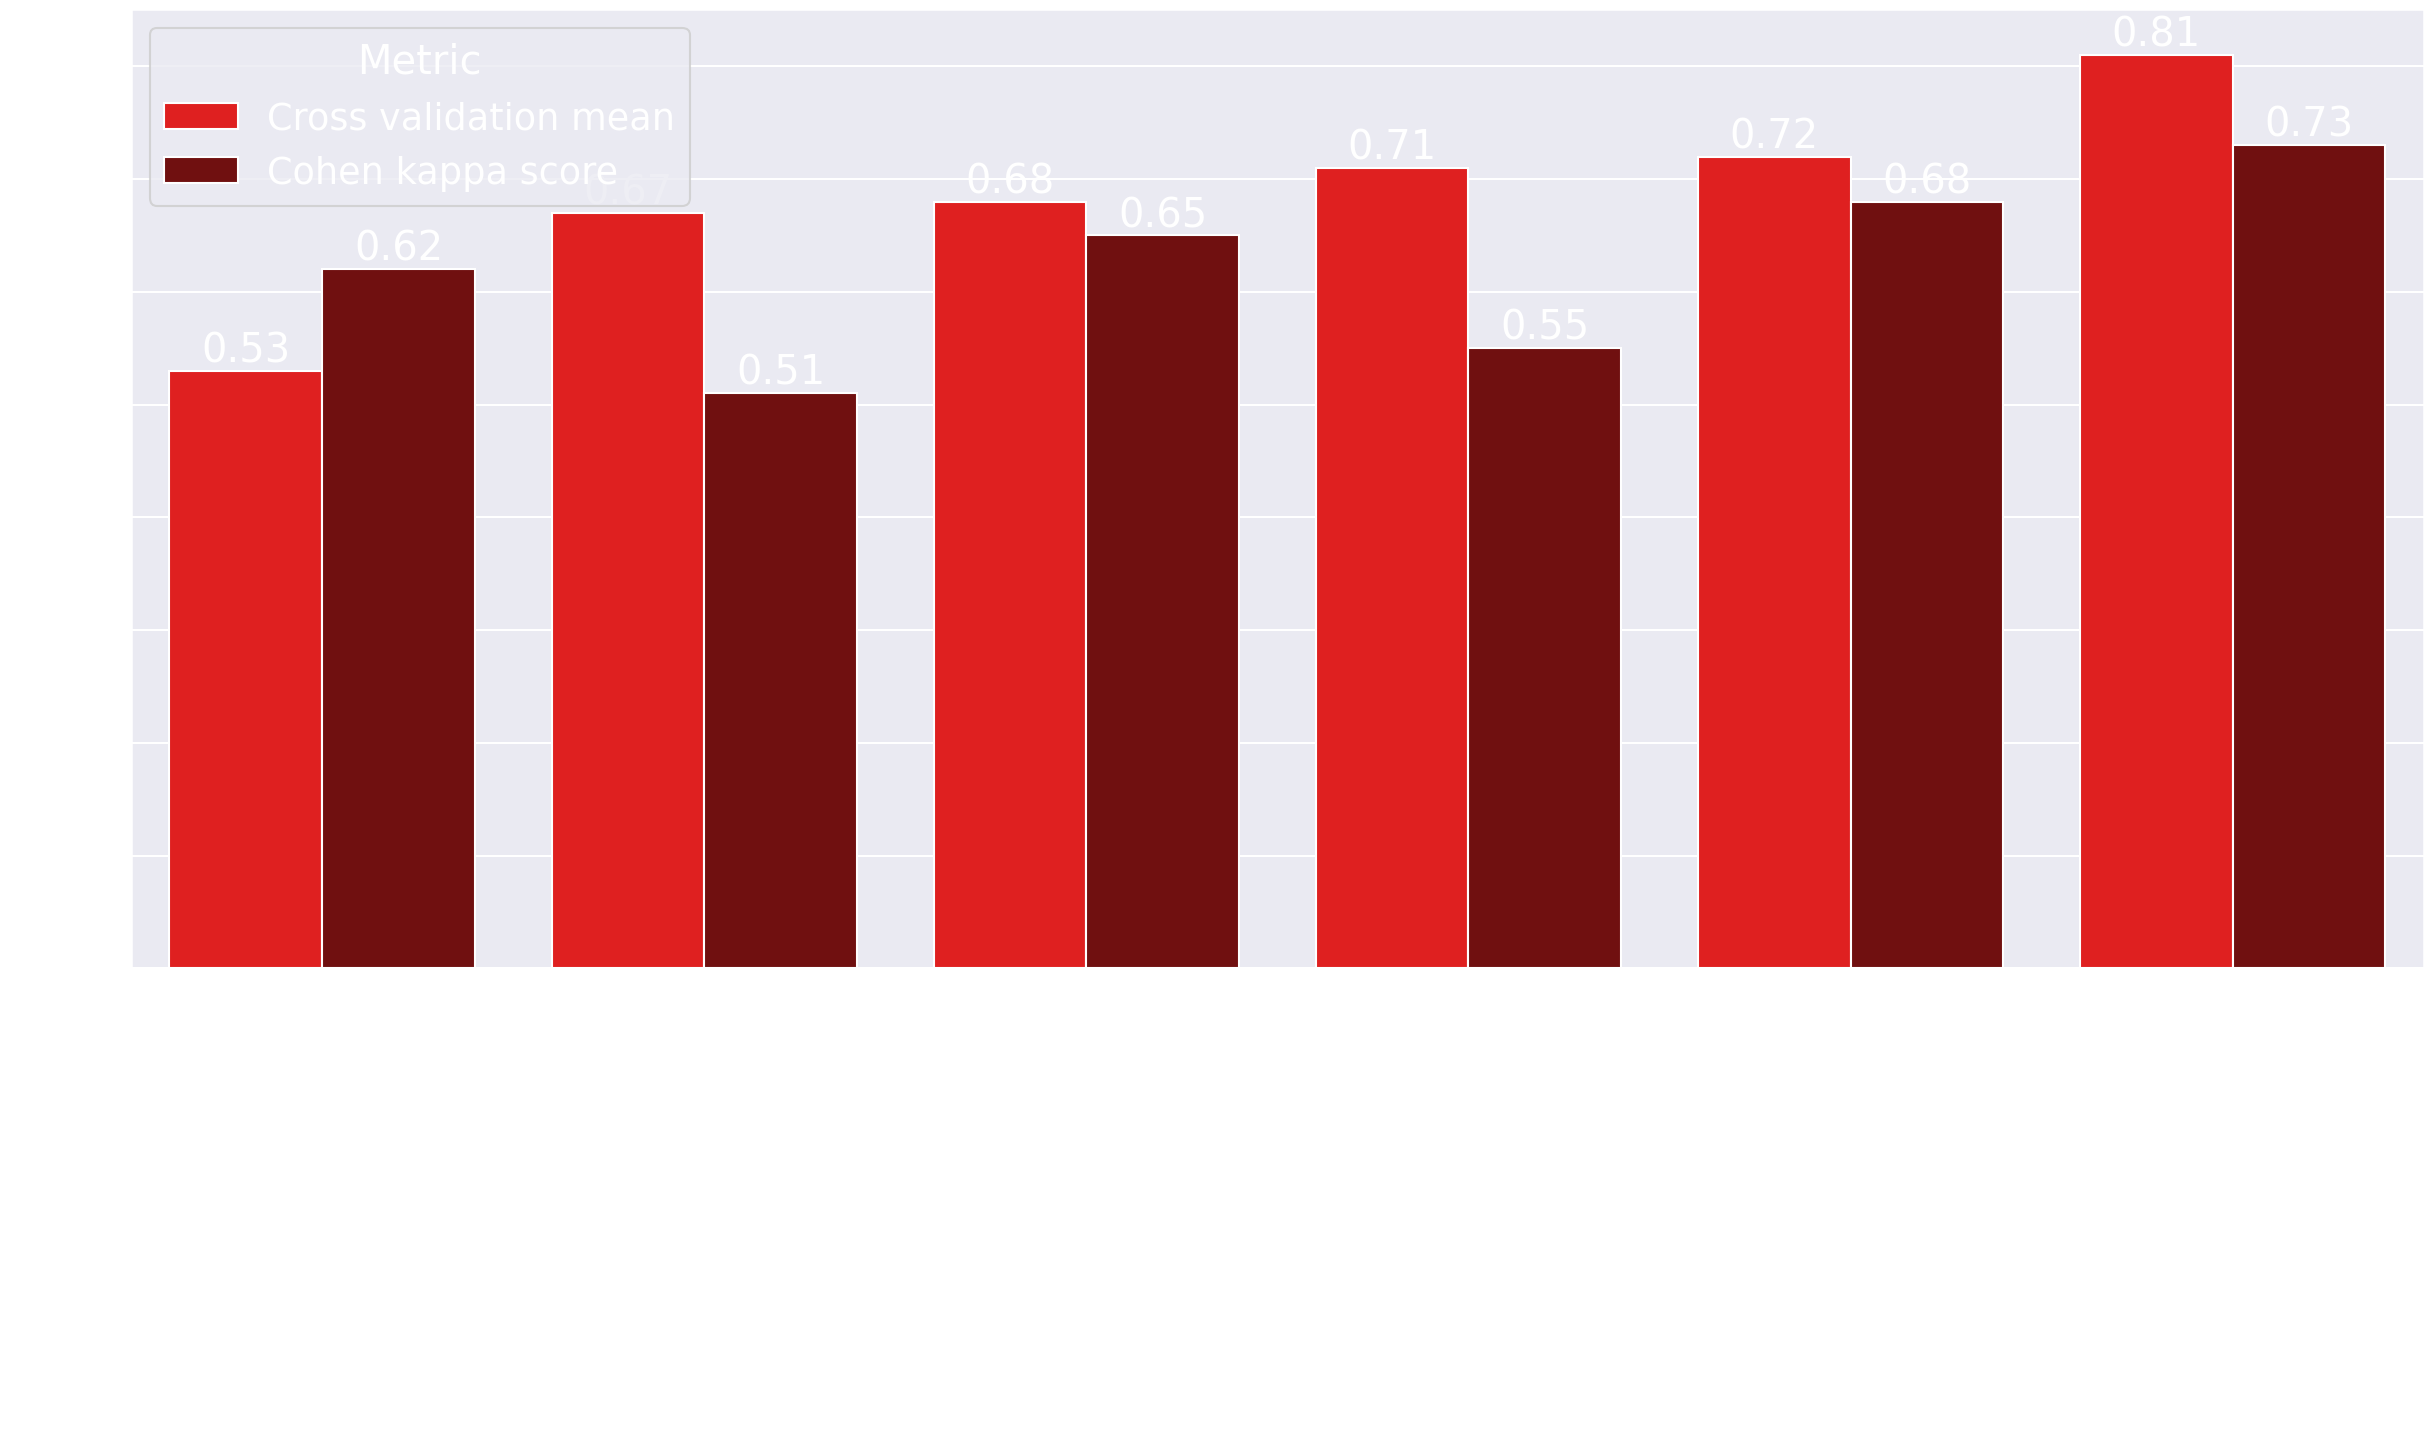

In [82]:
# compare different algorithms in a bar chart
comp = []
index = []
for er in evaluation_result:
    algo_title = str(er['algo'])
    algo_title = algo_title[:algo_title.find('(')]
    comp.append([algo_title, 'Cross validation mean', round(er['cross val mean'], 2)])
    comp.append([algo_title, 'Cohen kappa score',  round(er['cohen kappa score'], 2)])

df = pd.DataFrame(
    data=comp,
    columns=["Algorithm", "Metric", "Value"]
)

display(df)

sns.set_context('talk', font_scale=1.6)
ax = sns.barplot(
    data=df,
    x='Algorithm',
    y='Value',
    hue='Metric',
    palette=['red', 'maroon']
    #palette=['yellow', 'orange']
)
plt.xticks(rotation=60)
plt.tight_layout()

ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

w.sv()

In [7]:
print(w.best_rfc_params())

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [79]:
# ALL wines with SMOTE
res = w.learn_rfc(random_state=1, wine_type=None, smote=True)

=================== None ===================
accuracy score 0.8748403575989783
cohen kappa score 0.8122586480293446
cross val score [0.6939123  0.76202639 0.71945509 0.84248616 0.83226905]
cross val score mean 0.7700297999148574
classification report               precision    recall  f1-score   support

        high       0.96      0.99      0.97       753
         low       0.82      0.88      0.85       796
      medium       0.85      0.77      0.81       800

    accuracy                           0.87      2349
   macro avg       0.88      0.88      0.88      2349
weighted avg       0.87      0.87      0.87      2349



In [94]:
# WHITE wine with SMOTE
w.learn_rfc(random_state=1, smote=True)

=================== None ===================
accuracy score 0.8752660706683695
cohen kappa score 0.8128974275119132
cross val score [0.69476373 0.76415496 0.72200937 0.83482333 0.83482333]
cross val score mean 0.7701149425287356
classification report               precision    recall  f1-score   support

        high       0.96      0.99      0.97       753
         low       0.81      0.88      0.84       796
      medium       0.86      0.77      0.81       800

    accuracy                           0.88      2349
   macro avg       0.88      0.88      0.88      2349
weighted avg       0.88      0.88      0.87      2349

Confusion matrix:


,high,low,medium
high,745,1,7
low,2,698,96
medium,29,158,613


In [96]:
# RED wine with SMOTE
w.learn_rfc(random_state=1, wine_type='red', smote=True)

=================== red ===================
accuracy score 0.8767395626242545
cohen kappa score 0.8151393005334915
cross val score [0.7693837  0.80876494 0.83266932 0.80278884 0.79282869]
cross val score mean 0.8012870981283613
classification report               precision    recall  f1-score   support

        high       0.98      1.00      0.99       170
         low       0.87      0.79      0.83       178
      medium       0.78      0.84      0.81       155

    accuracy                           0.88       503
   macro avg       0.88      0.88      0.88       503
weighted avg       0.88      0.88      0.88       503

Confusion matrix:


,high,low,medium
high,170,0,0
low,0,141,37
medium,3,22,130


In [99]:
# WHITE wine with WO SMOTE
w.learn_rfc(random_state=1, wine_type='white', smote=False, from_cache=False)

=================== white ===================
accuracy score 0.7948979591836735
cohen kappa score 0.5612067371628802
cross val score [0.60510204 0.61020408 0.67346939 0.68641471 0.66700715]
cross val score mean 0.6484394738487836
classification report               precision    recall  f1-score   support

        high       0.84      0.43      0.57        37
         low       0.76      0.67      0.71       324
      medium       0.81      0.88      0.84       619

    accuracy                           0.79       980
   macro avg       0.80      0.66      0.71       980
weighted avg       0.79      0.79      0.79       980

Confusion matrix:


,high,low,medium
high,16,0,21
low,0,216,108
medium,3,69,547


=================== white ===================
accuracy score 0.7948979591836735
cohen kappa score 0.5600502978337536
cross val score [0.59591837 0.61530612 0.66836735 0.68947906 0.6618999 ]
classification report               precision    recall  f1-score   support

        high       0.84      0.43      0.57        37
         low       0.76      0.66      0.71       324
      medium       0.81      0.89      0.85       619

    accuracy                           0.79       980
   macro avg       0.80      0.66      0.71       980
weighted avg       0.79      0.79      0.79       980



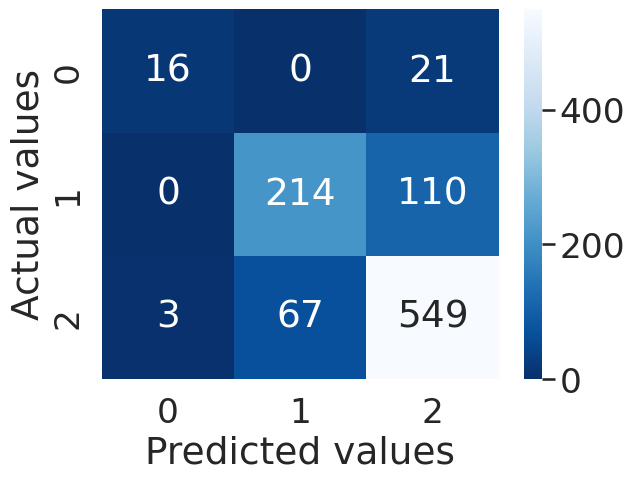

In [9]:
# RED wine with WO SMOTE
res = w.learn_rfc(random_state=1, wine_type='white', smote=False)
w.print_confusion_matrix(res['confusion matrix'])

In [100]:
# WHITE wine with SMOTE and NO HIGH QUALITY
res = w.learn_rfc(random_state=1, wine_type='white', smote=True, include_high=False, from_cache=False)
w.print_confusion_matrix(res['confusion matrix'])

=================== white ===================
accuracy score 0.8465909090909091
cohen kappa score 0.6932060734783365
cross val score [0.67938312 0.67018684 0.74492283 0.85621446 0.84727864]
cross val score mean 0.7595971757730491
classification report               precision    recall  f1-score   support

         low       0.84      0.86      0.85       614
      medium       0.86      0.83      0.84       618

    accuracy                           0.85      1232
   macro avg       0.85      0.85      0.85      1232
weighted avg       0.85      0.85      0.85      1232

Confusion matrix:


,low,medium
low,528,86
medium,103,515


TypeError: 'NoneType' object is not subscriptable

In [101]:
# RED wine with SMOTE and NO HIGH QUALITY
res = w.learn_rfc(random_state=1, wine_type='red', smote=True, include_high=False, from_cache=False)
w.print_confusion_matrix(res['confusion matrix'])

=================== red ===================
accuracy score 0.8029850746268656
cohen kappa score 0.6058964029802859
cross val score [0.68656716 0.73134328 0.75820896 0.76716418 0.67664671]
cross val score mean 0.7239860577352757
classification report               precision    recall  f1-score   support

         low       0.79      0.83      0.81       168
      medium       0.82      0.77      0.80       167

    accuracy                           0.80       335
   macro avg       0.80      0.80      0.80       335
weighted avg       0.80      0.80      0.80       335

Confusion matrix:


,low,medium
low,140,28
medium,38,129


TypeError: 'NoneType' object is not subscriptable

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
1559,1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1694,1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...,...,...,...,...,...,...
141129,141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


LOW QUALITY
Low cnt: 110
min price: 5.0
max price: 9.0
mean price: 7.4818181818181815
median price: 8.0
-------------------------
MEDIUM QUALITY
cnt: 178
min price: 9.0
max price: 19.0
mean price: 12.325842696629213
median price: 12.0
-------------------------
HIGH QUALITY
cnt: 8
min price: 19.0
max price: 20.0
mean price: 19.625
median price: 20.0
Med cnt: 178
High cnt: 8
Median price: 10.0
Median price: 10.722972972972974
Low quality price: 5.0 - 9.0
Mid quality price: 10.0 - 15.0
High quality price: 16.0 - 20.0


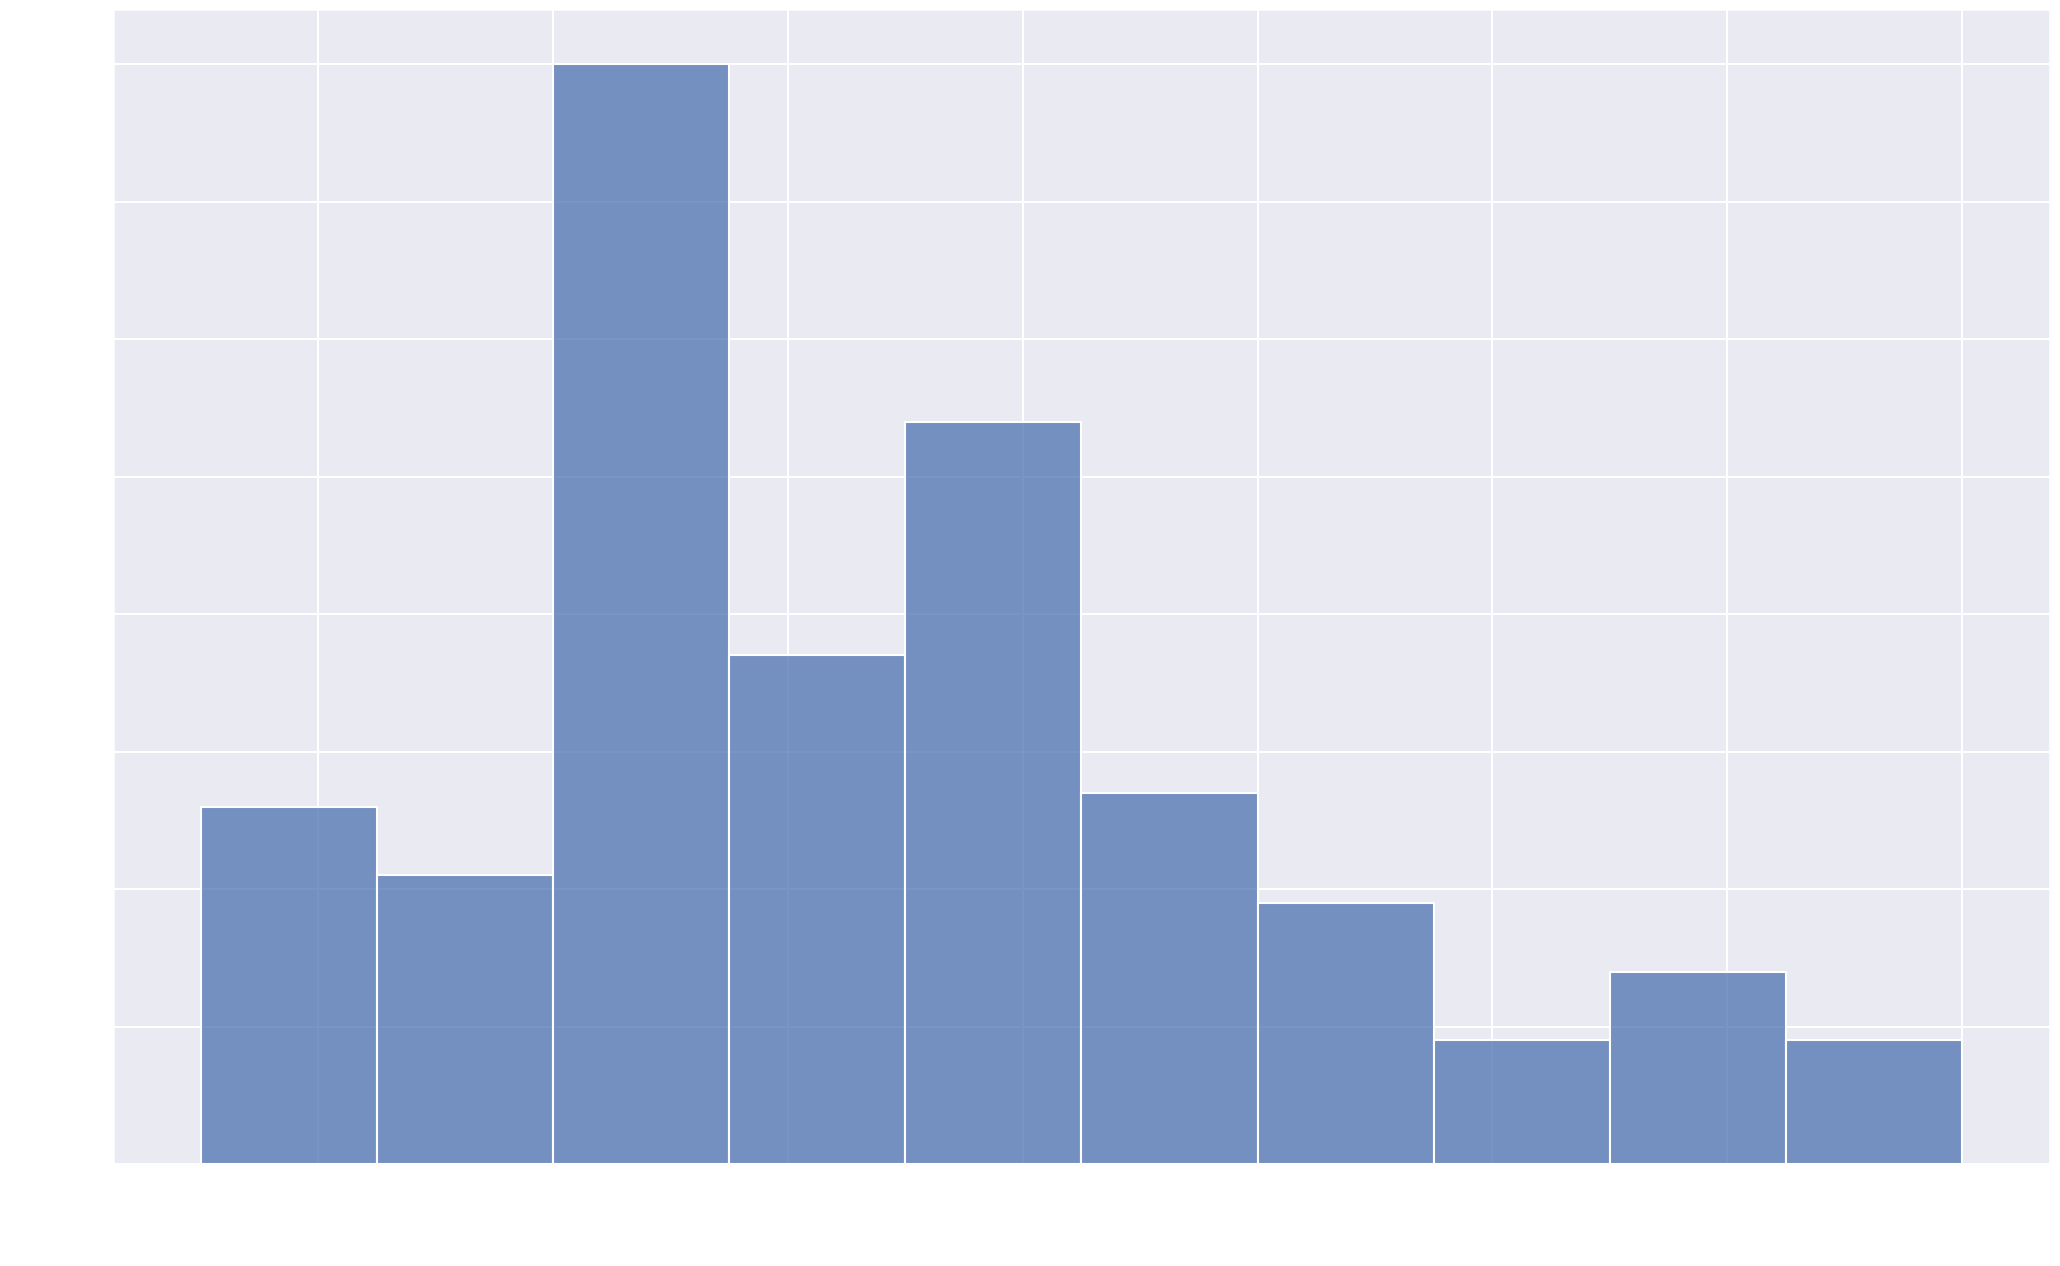

In [117]:
w.add_price_data()

In [84]:
w.leave_one_out_validate()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_3658/283235149.py", line 1, in <module>
    w.leave_one_out_validate()
  File "/home/user/dev/CodeAcademyBerlin-03-wine/WineDataSet.py", line 721, in leave_one_out_validate
    X, y = self.get_Xy()
  File "/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 515, in cross_val_score
    cv_results = cross_validate(
  File "/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/home/user/anaconda3/envs/env310/lib/python3.10/site-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/home/user/anaconda3/envs/env310/lib/python3.10/s

In [76]:
# check wine type
w.evaluate_ml_for_type(smote=True, show_progress=True, random_state=1)

IntProgress(value=0, max=6)

[{'features': ['residual sugar',
   'chlorides',
   'total sulfur dioxide',
   'density',
   'pH',
   'sulphates',
   'alcohol'],
  'algo': SVC(),
  'cohen kappa score': 0.9836730103824243,
  'cross val score': array([0.88214286, 0.90811639, 0.88871873, 0.88871873, 0.89943849]),
  'cross val mean': 0.8934270400350033,
  'classification report': {'red': {'precision': 0.9949135300101729,
    'recall': 0.9888776541961577,
    'f1-score': 0.9918864097363082,
    'support': 989},
   'white': {'precision': 0.9887410440122825,
    'recall': 0.9948506694129763,
    'f1-score': 0.9917864476386037,
    'support': 971},
   'accuracy': 0.9918367346938776,
   'macro avg': {'precision': 0.9918272870112277,
    'recall': 0.9918641618045669,
    'f1-score': 0.9918364286874559,
    'support': 1960},
   'weighted avg': {'precision': 0.9918556300591772,
    'recall': 0.9918367346938776,
    'f1-score': 0.9918368876970882,
    'support': 1960}},
  'confusion matrix': array([[978,  11],
         [  5, 966]

In [103]:
w.learn_rfc_type()

accuracy score 0.9964285714285714
cohen kappa score 0.9928567412161866
cross val score [0.99336735 0.9913221  0.99642675 0.99693721 0.99897907]
cross val score mean 0.9954064964423748
classification report               precision    recall  f1-score   support

         red       1.00      0.99      1.00       989
       white       0.99      1.00      1.00       971

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.00      1.00      1.00      1960

Confusion matrix:


,red,white
red,984,5
white,2,969
